# Bauteilerkennung mit KNN #

### Imports ###

In [48]:
from PIL import Image
from numpy import asarray, argmin,argmax
from matplotlib import pyplot
import math

### Load Trainings Data ###

In [35]:
trainData = []
numOfCaps = 1
numOfRes = 1
for x in range(0,numOfCaps):
    image = Image.open('./trainingsImages/caps/{x}.png'.format(x=x)).convert('L')
    data = 1 - asarray(image)/255
    trainData.append(["cap",data])
for x in range(0,numOfRes):
    image = Image.open('./trainingsImages/resistors/{x}.png'.format(x=x)).convert('L')
    data = 1 - asarray(image)/255
    trainData.append(["resistor",data])
for x in range(0,numOfRes):
    image = Image.open('./trainingsImages/indu/{x}.png'.format(x=x)).convert('L')
    data = 1 - asarray(image)/255
    trainData.append(["indu",data])


### KNN ###

In [39]:
def distance(referenceImage,otherImage):
    size = len(referenceImage)
    sum_ = 0;
    for x in range(0,size):
        othersize = len(referenceImage[x])
        for y in range(0,othersize):
            sum_ += (referenceImage[x,y] - otherImage[x,y])**2
    return math.sqrt(sum_)

### Load trainings Data ###

In [57]:
image = Image.open('./test.png').convert('L')
testData = 1 - asarray(image)/255

### Classify ###

My traingins data Size: 3
My Guess resistor
I am so shure: 91.5182251248081%


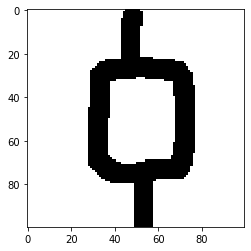

In [58]:
trainImages = list(map(lambda x: x[1],trainData))
trainLables = list(map(lambda x: x[0],trainData))

distances = list(map(lambda x: distance(testData,x),trainImages))

# Find minimal distance,get index and get the Lable of the training Image
min_index = argmin(distances)
min_dist = distances[min_index]
print("My traingins data Size: " + str(len(trainImages)))
print("My Guess " + str(trainLables[min_index]))

#get sencond min
del distances[min_index]
second_min_index = argmin(distances)
second_min_dist = distances[second_min_index]

#get maximum
max_index = argmax(distances)
max_dist = distances[max_index]

print("I am so shure: " + str(100*(second_min_dist-min_dist)/(max_dist-min_dist)) + "%")
pyplot.imshow(testData, cmap=pyplot.cm.binary)